###**SHETH L.U.J. & SIR M.V. COLLEGE**

Aayush D. Yadav | T123

**Practical No. 9**

**Aim**: Principal Component Analysis (PCA)
*   Perform PCA on a dataset to reduce dimensionality.
*   Evaluate the explained variance and select the appropriate number of principal components.
*    Visualize the data in the reduced-dimensional space.

### 1\. Reducing Features Using Principal Components

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Load the data
df = pd.read_csv("/content/finance_economics_dataset.csv")
# Keep only numeric columns for PCA
numeric_df = df.select_dtypes(include='number')
# Standardize
X = StandardScaler().fit_transform(numeric_df)
# PCA to retain 99% variance
pca = PCA(n_components=0.99, whiten=True)
# Fit PCA
X_pca = pca.fit_transform(X)

# Output sizes
print('Original number of numeric features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of numeric features: 22
Reduced number of features: 19


### 2\. Reducing Features When Data Is Linearly Inseparable

In [ ]:
from sklearn.decomposition import KernelPCA
import pandas as pd

# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Standardize the numeric features
X = StandardScaler().fit_transform(numeric_df)

# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
X_kpca = kpca.fit_transform(X)

# Output sizes
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_kpca.shape[1])

Original number of features: 22
Reduced number of features: 1


### 3\. Reducing Features by Maximizing Class Separability

Dataset Shape: (3000, 24)


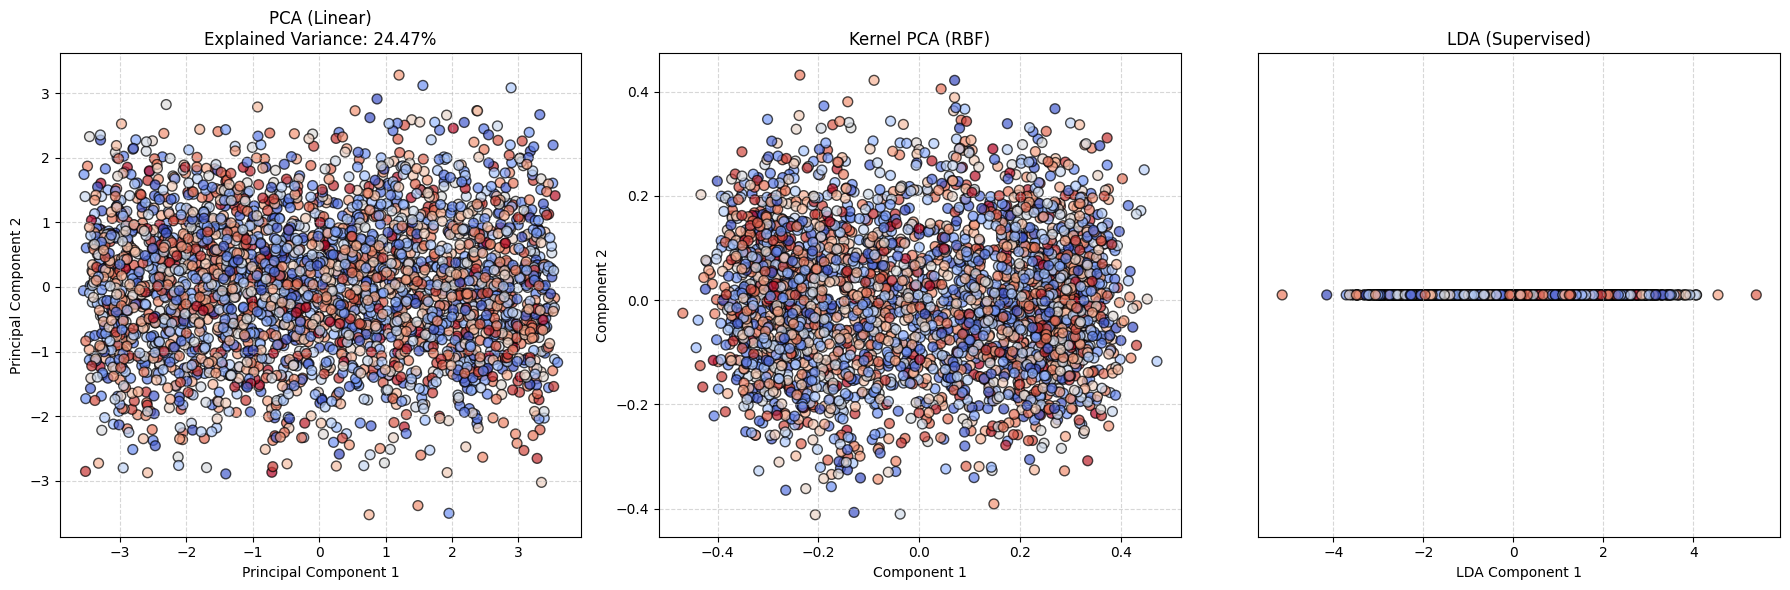

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

# Data Loading
# Load the CSV, allowing pandas to infer the header.
# The original error was caused by `header=None` which treated the first row (column names) as data.
df = pd.read_csv("/content/finance_economics_dataset.csv")

print("Dataset Shape:", df.shape)

# Preprocessing
# The original `X = df.iloc[:, :-1]` included non-numeric columns like 'Date' and 'Stock Index' because of `header=None`.
# `StandardScaler` expects numerical input, leading to the 'could not convert string to float' error.
# We need to select only the numeric columns for X.

# Identify the target column, which is assumed to be the last one.
y = df.iloc[:, -1]
# Identify the features (X) by selecting all numeric columns, excluding the target column.
X = df.drop(columns=df.columns[-1]).select_dtypes(include=np.number)


le = LabelEncoder()
# Note: If `y` (e.g., 'Consumer Spending (Billion USD)') is a continuous variable,
# using LabelEncoder will treat each unique value as a separate class.
# This might not be appropriate for dimensionality reduction techniques like LDA
# which typically expect discrete class labels.
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction
# 1. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_var = np.sum(pca.explained_variance_ratio_)

# 2. Kernel PCA
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_kpca = kpca.fit_transform(X_scaled)

# 3. LDA
# Note: LDA is a supervised method that works best with discrete class labels.
# If `y` is a continuous variable, the results from LDA might not be meaningful
# in a classification context without prior discretization.
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y_encoded) # Use y_encoded for LDA

# Plotting
plt.figure(figsize=(18, 6))

# PCA Plot
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='coolwarm', edgecolor='k', s=50, alpha=0.7)
plt.title(f"PCA (Linear)\nExplained Variance: {pca_var:.2%}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
# Removed the legend as it's not meaningful for a continuous variable with many unique values
# plt.legend(handles=scatter.legend_elements()[0], labels=list(le.classes_), title="Class")
plt.grid(True, linestyle='--', alpha=0.5)

# Kernel PCA Plot
plt.subplot(1, 3, 2)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_encoded, cmap='coolwarm', edgecolor='k', s=50, alpha=0.7)
plt.title("Kernel PCA (RBF)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True, linestyle='--', alpha=0.5)

# LDA Plot
plt.subplot(1, 3, 3)
plt.scatter(X_lda, np.zeros_like(X_lda), c=y_encoded, cmap='coolwarm', edgecolor='k', s=50, alpha=0.7)
plt.title("LDA (Supervised)")
plt.xlabel("LDA Component 1")
plt.yticks([])
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


DataFrame Shape: (3000, 24)

Features shape: (3000, 23)
Target unique values: [ 4589 10101 13665 ...  2200  5261 11979]

Original feature count: 23
Reduced feature count: 1
Explained variance ratio: [0.08940595]


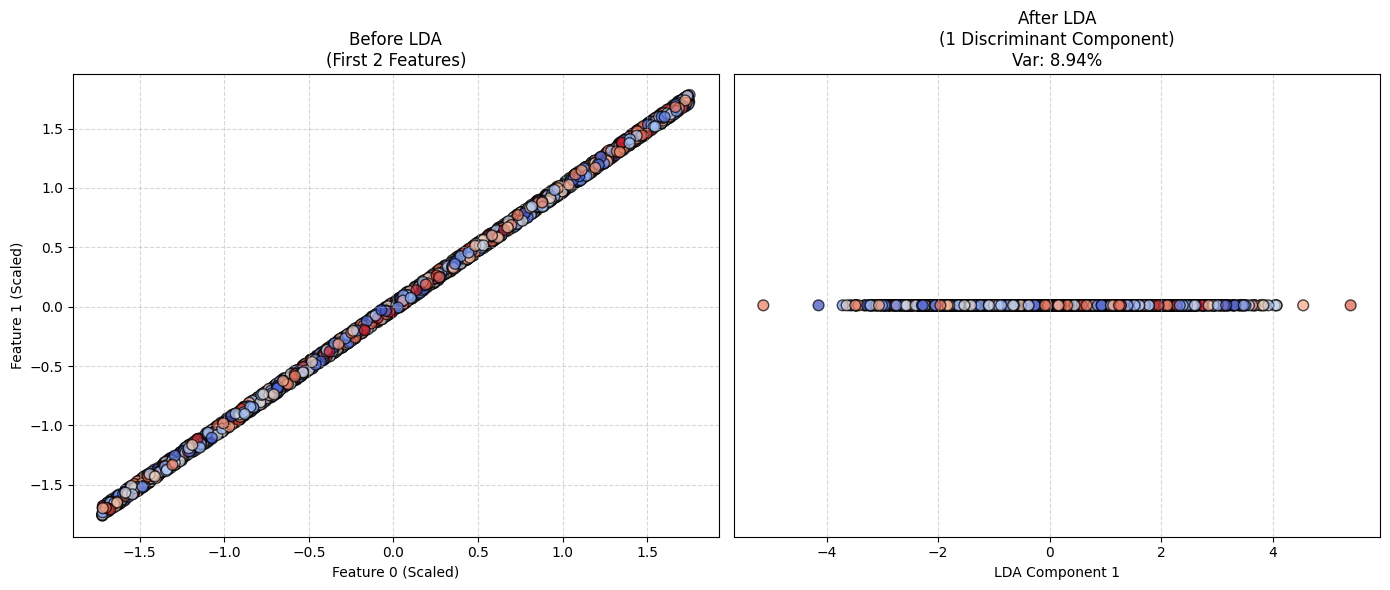

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data Loading
df = pd.read_csv("/content/finance_economics_dataset.csv")

#print("First 5 rows:\n", df.head())
print("\nDataFrame Shape:", df.shape)

# Preprocessing
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(f"\nFeatures shape: {X.shape}")
print(f"Target unique values: {y.unique()}")

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_numeric = X.select_dtypes(include='number')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# LDA Reduction
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

print("\nOriginal feature count:", X.shape[1])
print("Reduced feature count:", X_lda.shape[1])
print("Explained variance ratio:", lda.explained_variance_ratio_)

# Plotting
plt.figure(figsize=(14, 6))

# Plot A: Before LDA
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_encoded, cmap='coolwarm', edgecolors='k', s=60, alpha=0.7)
plt.title("Before LDA\n(First 2 Features)")
plt.xlabel("Feature 0 (Scaled)")
plt.ylabel("Feature 1 (Scaled)")
plt.grid(True, linestyle='--', alpha=0.5)

# Plot B: After LDA
plt.subplot(1, 2, 2)
plt.scatter(X_lda, np.zeros_like(X_lda), c=y_encoded, cmap='coolwarm', edgecolors='k', s=60, alpha=0.7)
plt.title(f"After LDA\n(1 Discriminant Component)\nVar: {lda.explained_variance_ratio_[0]:.2%}")
plt.xlabel("LDA Component 1")
plt.yticks([])
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()